In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('haberman.csv',header=None,names=['age_patient', 'year_treatment', 'positive_axillary_nodes', 'survival_status'])
df.head()

,age_patient,year_treatment,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_patient                306 non-null int64
year_treatment             306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.describe()

,age_patient,year_treatment,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


 
      1. There are no missing values in this dataset. So there is no need to handle missing values.
      2. The datatype of 'survival_status' column is in integer. It has to be converted into categorical datatype.
      3. The values of 'survival_status' column are not meanigful. Hence they are mapped to 'yes'(survived after 5 years)            and 'no' (not survived after 5 years)

In [5]:
df.isnull().sum()

age_patient                0
year_treatment             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

In [6]:
## now checking the survival_status column has unique values.
df['survival_status'].unique()

array([1, 2], dtype=int64)

#### Now converting the survival_status column datatype int to categorical

In [7]:
# modify the target column values to be meaningful as well as categorical
df['survival_status'] = df['survival_status'].astype('category')
df.head()

,age_patient,year_treatment,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#  Univariate Analysis

C:\Users\MD  Ezajul Hassan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


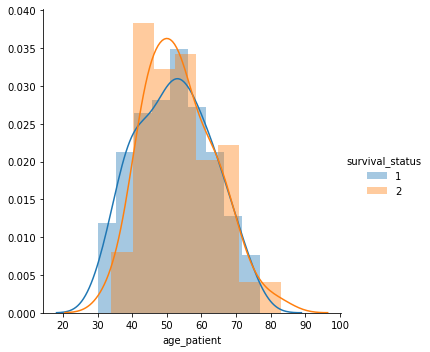

C:\Users\MD  Ezajul Hassan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


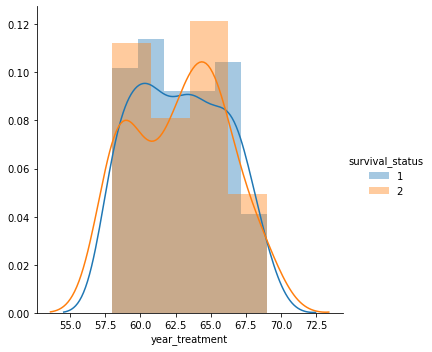

C:\Users\MD  Ezajul Hassan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


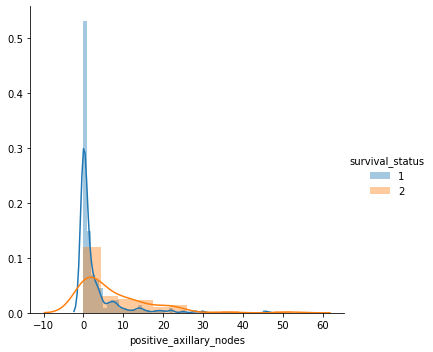

In [8]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

### Cumulative distributive function(cdf)

*******age_patient*******
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
*******year_treatment*******
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
*******positive_axillary_nodes*******
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.     

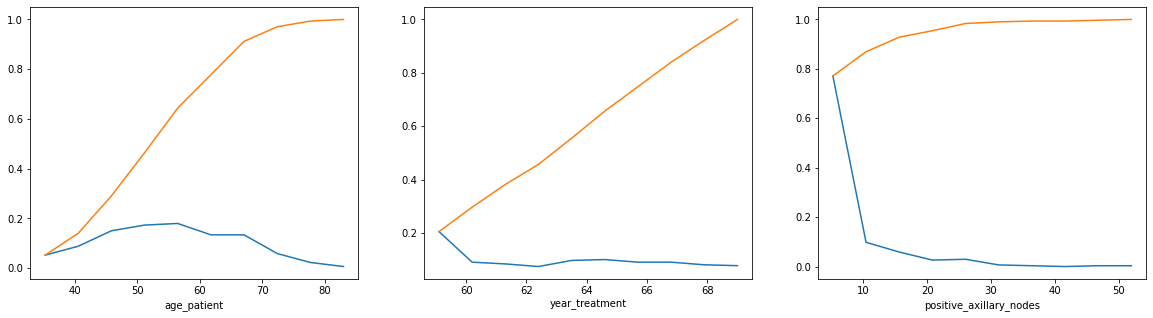

In [9]:
#The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("*"*7+feature+"*"*7)
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

# Box plot 
 #####  it is used to check outliers in the dataset

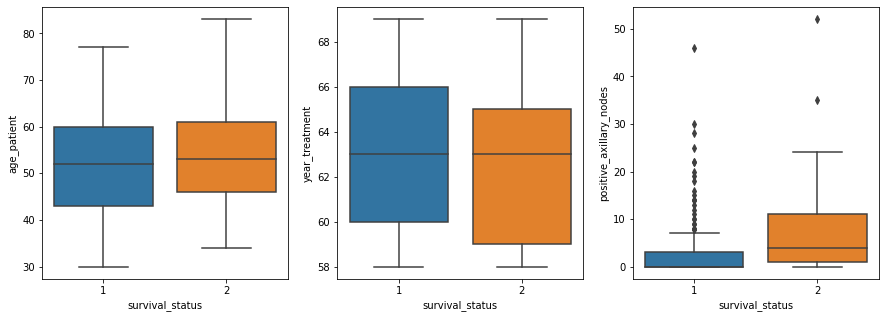

In [10]:
#Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()  

# Violin plot
### Violin plot is the combination of box plot and probability density function.

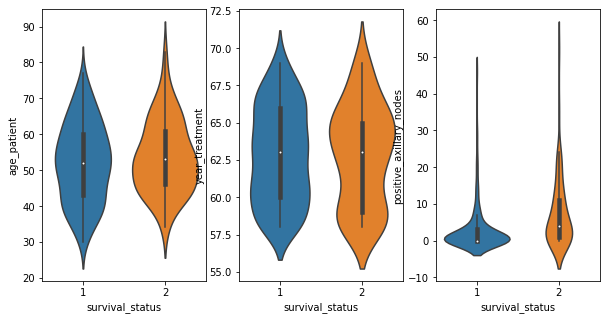

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()

## Bi-variate analysis

#### scatterplot

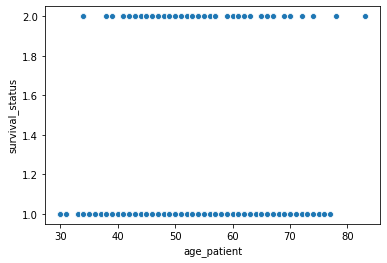

In [12]:
sns.scatterplot(x='age_patient', y='survival_status',data=df)

#### Pairplot

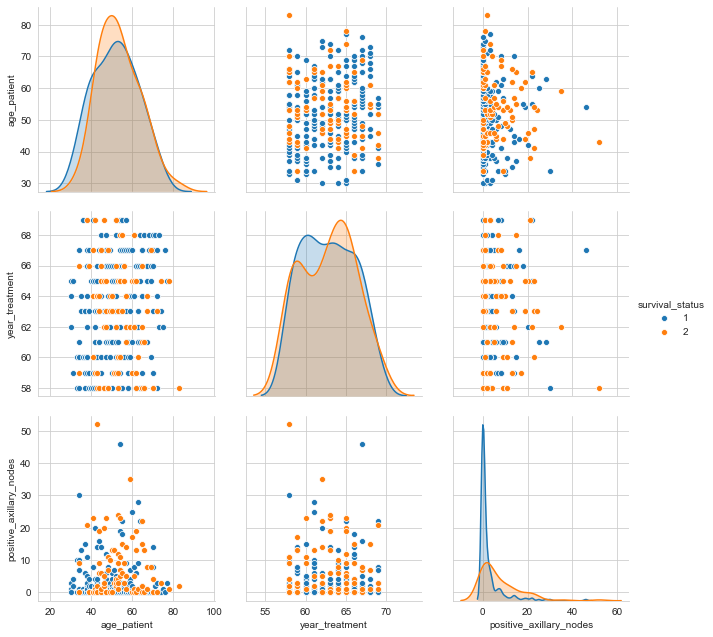

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='survival_status', vars=['age_patient', 'year_treatment', 'positive_axillary_nodes'], height=3)
plt.show()

In [14]:
x = df.drop('survival_status',axis='columns')
y = df.survival_status

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [17]:
x_train

,age_patient,year_treatment,positive_axillary_nodes
175,54,62,0
207,57,67,0
58,42,61,4
157,53,65,1
75,44,63,19
...,...,...,...
156,53,58,4
123,49,67,1
15,35,63,0
125,50,64,0


In [18]:
x_test

,age_patient,year_treatment,positive_axillary_nodes
111,48,62,2
281,69,67,8
236,61,68,0
127,50,61,6
188,55,69,22
...,...,...,...
21,37,59,6
270,66,58,0
78,44,61,0
214,58,61,2


#### for classification dependent variable i am using Logistic Regression algorithm

### model building

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\MD  Ezajul Hassan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_predict = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[66,  6],
       [15,  5]], dtype=int64)